In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [8]:
x = np.array([50, 50, 46, 95, 50, 5, 57, 42, 26, 72, 78, 60, 40, 17, 85])
y = np.array([50000, 54000, 50000, 189000, 55000, 40000, 59000, 42000, 47000, 78000, 119000, 95000, 49000, 29000, 130000])

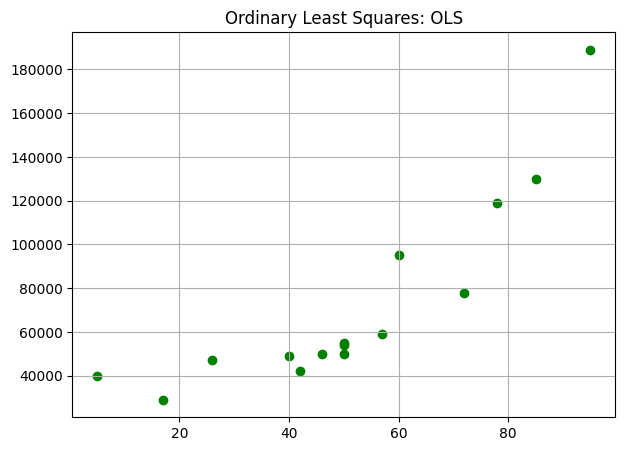

In [10]:
plt.figure(figsize=(7, 5))
plt.scatter(x, y, color='g')
plt.title('Ordinary Least Squares: OLS')
plt.grid()
plt.show()

In [13]:
x.shape

(15, 1)

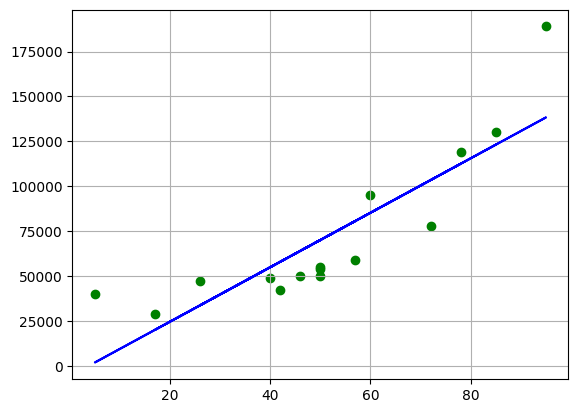

In [15]:
reg = LinearRegression()
x = x.reshape(-1, 1)
reg.fit(x, y)
linhaReg = x * reg.coef_ + reg.intercept_

plt.scatter(x, y, color='g')
plt.plot(x, linhaReg, color='b')
plt.grid()

In [26]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing.keys()

houseData = pd.DataFrame(housing.data, columns = housing.feature_names)
targetData = pd.DataFrame(housing.target)

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(houseData, targetData, test_size=0.30)

In [41]:
regHouses = LinearRegression()
regHouses.fit(x_train, y_train)
pred = regHouses.predict(x_test)

print(f'MAE: {metrics.mean_absolute_error(y_test, opred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, pred))}')
print(f'R2: {metrics.r2_score(y_test, pred)}')

MAE: 0.5334245571904362
MSE: 0.5187609068464378
RMSE: 0.7202505861479308
R2: 0.6163625155953776


In [43]:
from sklearn.model_selection import cross_val_predict
x = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.DataFrame(housing.target, columns=housing.target_names)

predictedCV = cross_val_predict(LinearRegression(), x, y, cv=50)

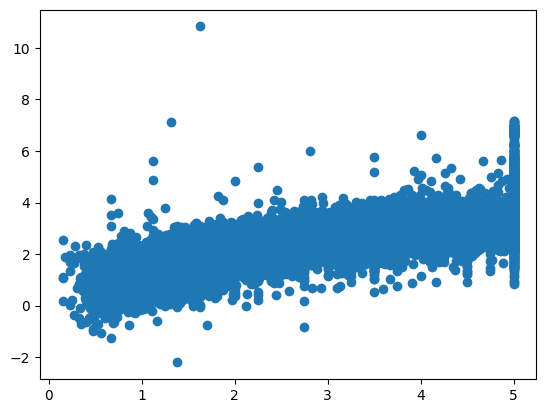

In [44]:
plt.scatter(housing.target, predictedCV)

In [46]:
print(f'MAE: {metrics.mean_absolute_error(housing.target, predictedCV)}')
print(f'MSE: {metrics.mean_squared_error(housing.target, predictedCV)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(housing.target, predictedCV))}')
print(f'R2: {metrics.r2_score(housing.target, predictedCV)}')

MAE: 0.5385519847454353
MSE: 0.5385770564711349
RMSE: 0.7338780937397811
R2: 0.5955263151245238
